In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import openpyxl

In [2]:
#   Visualisere og beholde info om XP-points for neste GW, sammenligne med forrige GW. Lagre i excel/CSV fil og oppdatere den for hver runde. 
#   1. Få tak i data-en som skal visualiseres og beholdes.
#    - latest_optimal_plan_data.groupby("week")[["xP"]].sum() 
# 
#    week	xP
#   17	  63.43
#   18	  66.31
#   19	  56.86

latest_optimal_plan_data = pd.read_csv("../output/optimal_plan_regular.csv")

# latest_optimal_plan_data.groupby("week")[["xP"]].sum()

In [3]:
latest_optimal_plan_data.head(4)

,Unnamed: 0,week,name,pos,type,team,buy_price,sell_price,xP,xMin,lineup,bench,captain,vicecaptain,transfer_in,transfer_out
0,4,17,Ward,GKP,1,Leicester,4.1,4.0,3.40,88,1,-1,0,0,0,0
1,1,17,Dunk,DEF,2,Brighton,4.7,4.6,3.56,86,1,-1,0,0,0,0
2,12,17,Trippier,DEF,2,Newcastle,5.9,5.6,3.87,87,1,-1,0,0,0,0
3,7,17,Cancelo,DEF,2,Man City,7.4,7.3,4.24,77,1,-1,0,0,0,0


In [4]:
# def start_ellever(next_gw, data):
#         next_gw= data.loc[(data["week"]==next_gw)& (data['lineup']== 1) &]
#         return next_gw


_#gw17_start_players = latest_optimal_plan_data.loc[(latest_optimal_plan_data['week']==17) & (latest_optimal_plan_data['lineup']== 1)]


# # sns.barplot(data=gw17_start_players, x="xP", y="name")
# sns.set_theme(style="whitegrid", palette="pastel")

# # # Initialize the matplotlib figure
# f, ax = plt.subplots(figsize=(20, 5))


            
# sns.set_color_codes("dark")
# sns.barplot(x="xP", y="name", data=gw17_start_players.sort_values("xP", ascending=False),label="xP startspillere", color="b")   





           

# # Add a legend and informative axis label
# ax.legend(ncol=1, loc="lower right", frameon=True)
# # ax.set(xlim=) her setter jeg størrelsen på figure. Aksen går her fra 0 til 100
# ax.set(xlim=(0, 10),  ylabel= "", xlabel="xP startspillere")
# sns.despine(left=True, bottom=False)

# # # label each bar in barplot https://medium.com/swlh/quick-guide-to-labelling-data-for-common-seaborn-plots-736e10bf14a9
# for p in ax.patches: 
#         height = p.get_height() # height of each horizontal bar is the same
#         width = p.get_width() # width 
#         # adding text to each bar
#         ax.text(x = width+0.1, # x-coordinate position of data label, padded 1 to right of bar
#         y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
#         s = "{:.0f}".format(width), # data label, formatted to ignore decimals
#         va = "center") # sets vertical alignment (va) to center

,Unnamed: 0,week,name,pos,type,team,buy_price,sell_price,xP,xMin,lineup,bench,captain,vicecaptain,transfer_in,transfer_out
0,4,17,Ward,GKP,1,Leicester,4.1,4.0,3.40,88,1,-1,0,0,0,0
1,1,17,Dunk,DEF,2,Brighton,4.7,4.6,3.56,86,1,-1,0,0,0,0
2,12,17,Trippier,DEF,2,Newcastle,5.9,5.6,3.87,87,1,-1,0,0,0,0
3,7,17,Cancelo,DEF,2,Man City,7.4,7.3,4.24,77,1,-1,0,0,0,0


In [5]:
# sns.set_theme(style="white", palette="pastel")

# sns.lineplot(data=latest_optimal_plan_data.groupby("week").sum(numeric_only=True), x="week", y="xP")

xP =[]
for i in range(1,17):
    xP.append(0)
xP

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [6]:
team_id = "2821496"
current_week = "7"
url = "https://fantasy.premierleague.com/api/entry/"+team_id+"/event/"+current_week+"/picks/"
my_team_data = requests.get(url)
my_team_data = my_team_data.json()
my_team_data["entry_history"]["points"]




0

In [7]:
points=[]
Week=[]
def get_team_points(week, id):
    team_id = id
    current_week = str(week)
    url = "https://fantasy.premierleague.com/api/entry/"+team_id+"/event/"+current_week+"/picks/"
    my_team_data = requests.get(url)
    my_team_data = my_team_data.json()
    Week.append(current_week)
    points.append(my_team_data["entry_history"]["points"])

In [8]:
for i in range(1,17):
    get_team_points(i, "2821496")

In [9]:
print(points)
print(Week)
faktiske_poeng={"Uke":Week, "Poeng":points}

[67, 79, 44, 83, 79, 40, 0, 66, 78, 58, 59, 54, 71, 43, 57, 63]
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']


In [10]:
df_poeng_xP = pd.DataFrame(faktiske_poeng)
df_poeng_xP.set_index("Uke", inplace=False)
df_poeng_xP["xP"]= xP
df_poeng_xP.to_csv("../output/Poengsammendrag")

In [11]:
# sns.set_theme(style="white", palette="pastel")

# # sns.lineplot(data=df_poeng_xP, x="Uke", y="Poeng")

# # Add a legend and informative axis label
# ax.legend(ncol=1, loc="lower right", frameon=True)
# # ax.set(xlim=) her setter jeg størrelsen på figure. Aksen går her fra 0 til 100
# ax.set(xlim=(0, 10),  ylabel= "Poeng", xlabel="xP startspillere")

# sns.despine(left=True, bottom=False)

# # plot line graph
# sns.set(rc={"figure.figsize":(10,10)})
# ax = sns.lineplot(data=df_poeng_xP, x="Uke", y="Poeng" ,marker="*", color="#965786")
# ax1 = sns.lineplot(data=df_poeng_xP, x="Uke", y="xP" ,marker="*")
# ax.set(title="Poeng for hver uke")# label points on the plot
# for x, y in zip(df_poeng_xP["Uke"], df_poeng_xP["Poeng"]):
#  # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
#         plt.text(x = x, # x-coordinate position of data label
#         y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
#         s = "{:.0f}".format(y), # data label, formatted to ignore decimals
#         color = "purple") # set colour of line
# for x, y in zip(df_poeng_xP["Uke"], df_poeng_xP["xP"]):
#  # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
#         plt.text(x = x, # x-coordinate position of data label
#         y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
#         s = "{:.0f}".format(y), # data label, formatted to ignore decimals
#         color = "purple") # set colour of line

In [12]:
# lage funksjoner som legger inn nye uker. https://pythonexamples.org/pandas-dataframe-add-append-row/

In [13]:
def points_without_cap (data, next_gw):
    """Gir summen av xP uten kapteinen, kan gjøres bedre etterhvert tenker jeg"""
    return data.loc[(data["week"]==next_gw)& (data['lineup']== 1) & (data["captain"]!=1), ["xP"]].sum()

In [14]:
def double_captain_points(data, next_gw):
    """Gir sum av kapteinens totalepoeng for gitte uke. Sett at dataframe inneholder week, xP og captain kolonner"""
    data.loc[(data["captain"] ==1) & (data["week"]==next_gw), ["xP"]]*2
    return data.loc[(data["captain"] ==1) & (data["week"]==next_gw), ["xP"]]*2

In [15]:

def expected_points(data, next_gw):
    """Funksjon som bruker to andre funksjoner for å hente summen av xP for Next_gw i datasett"""
    doubled_captain= double_captain_points(data, next_gw)
    
    expected_points= points_without_cap(data, next_gw)

    return int(expected_points.sum() + doubled_captain.sum())

In [16]:
expected_points(latest_optimal_plan_data, 17)


58

In [17]:

def add_new_row(data, gameweek):
    """Legger til ny row med data"""
    # if (data['Uke'].eq(f'{gameweek}')).any() == False:
    new_row = {'Uke':f"{gameweek}", 'Poeng':0, #get_team_points(gameweek, 2821496), 
    'xP':expected_points(latest_optimal_plan_data, gameweek)}
    new_row2= pd.Series(new_row)
    #append row to the dataframe
    data.loc[len(data.index)] = new_row2
    return data

def get_team_points(week, id):
    team_id = str(id)
    current_week = str(week)
    url = "https://fantasy.premierleague.com/api/entry/"+team_id+"/event/"+current_week+"/picks/"
    my_team_data = requests.get(url)
    my_team_data = my_team_data.json()
    return my_team_data["entry_history"]["points"]


In [18]:
df_poeng_xP

,Uke,Poeng,xP
0,1,67,0
1,2,79,0
2,3,44,0
3,4,83,0
4,5,79,0
5,6,40,0
6,7,0,0
7,8,66,0
8,9,78,0
9,10,58,0


In [30]:
def poeng_vs_expected_graf(data, gameweek):        
       sns.set_theme(style="white", palette="pastel")
       f, ax = plt.subplots(figsize=(10, 10))
       # Lage funksjon som lager datafilen som brukes
       # data = df_poeng_xp()
       sns.despine(left=True, bottom=False)
        # plot line graph
       sns.set(rc={"figure.figsize":(10,10)})
       ax = sns.lineplot(data=add_new_row(data, gameweek), x= "Uke", y="Poeng" ,marker="*")
       ax1 = sns.lineplot(data=add_new_row(data, gameweek), x= "Uke", y="xP" ,marker="*")
       ax.set(title="Poeng for hver uke")# label points on the plot
       for x, y in zip(add_new_row(data, gameweek)["Uke"], add_new_row(data, gameweek)["Poeng"]):
        # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
              plt.text(x = x, # x-coordinate position of data label
              y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
              s = "{:.0f}".format(y), # data label, formatted to ignore decimals
              color = "purple") # set colour of line
       for x, y in zip(add_new_row(data, gameweek)["Uke"], add_new_row(data, gameweek)["xP"]):
        # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
              plt.text(x = x, # x-coordinate position of data label
              y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
              s = "{:.0f}".format(y), # data label, formatted to ignore decimals
              color = "purple") # set colour of line

       plt.savefig('../output/chart.png')

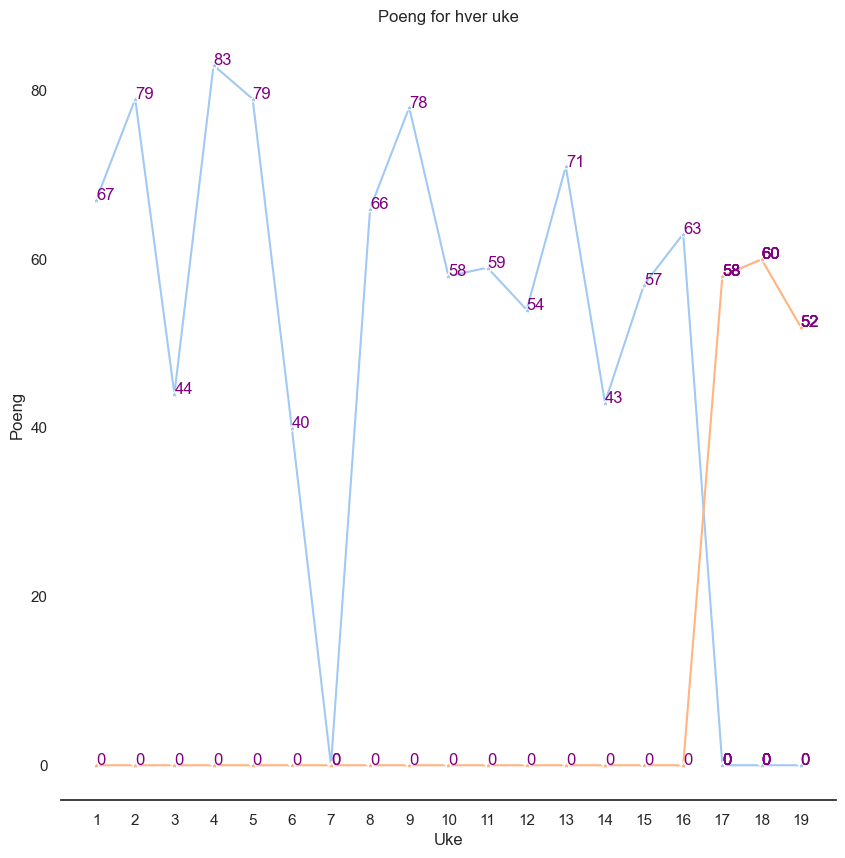

In [29]:
poeng_vs_expected_graf(df_poeng_xP, 19)

In [21]:
def startlag(data, gameweek):
   """Henter startelleveren ut i fra optimal plan csv"""
   startellever= data.loc[(data["week"]==gameweek)& (data['lineup']== 1)]
   startellever2 = startellever.drop(["Unnamed: 0","week", "type", "xMin", "bench", "transfer_in", "transfer_out"], axis = 1)
   startellever2.loc[startellever2["captain"]==1, ["xP"]] *=2
   return startellever2

def benklag(data, gameweek):
   benk = data.loc[(data["week"]==gameweek)& (data['bench']>= 1)]
   benk2 = benk.drop(["Unnamed: 0","week", "type", "xMin", "captain", "vicecaptain","lineup", "transfer_in", "transfer_out"], axis = 1)
   
   return benk2.sort_values(by=['bench'])

def transfer_in(data, gameweek):
   transferin= data.loc[(data["week"]==gameweek)& (data['transfer_in']== 1), ["name","team"]].values[0]
   return str(transferin)

def transfer_out(data, gameweek):
   transferout= data.loc[(data["week"]==gameweek)& (data['transfer_out']== 1), ["name","team"]].values[0]
   return str(transferout)

In [22]:
startlag(latest_optimal_plan_data,17)

,name,pos,team,buy_price,sell_price,xP,lineup,captain,vicecaptain
0,Ward,GKP,Leicester,4.1,4.0,3.40,1,0,0
1,Dunk,DEF,Brighton,4.7,4.6,3.56,1,0,0
2,Trippier,DEF,Newcastle,5.9,5.6,3.87,1,0,0
3,Cancelo,DEF,Man City,7.4,7.3,4.24,1,0,0
4,Foden,MID,Man City,8.3,8.3,4.26,1,0,0
5,Rashford,MID,Man Utd,6.7,6.6,4.92,1,0,0
6,Martinelli,MID,Arsenal,6.8,6.8,4.96,1,0,0
7,Zaha,MID,Crystal Palace,7.5,7.3,5.13,1,0,1
8,Wilson,FWD,Newcastle,7.4,7.4,4.40,1,0,0
9,Darwin,FWD,Liverpool,9.0,8.9,4.49,1,0,0


In [23]:
startlag(latest_optimal_plan_data,17)["xP"].sum()

58.11000000000001

In [24]:
from openpyxl.chart import LineChart, Reference

In [25]:
def rapport(data, gameweek):    
    # 1. Set up multiple variables to store the titles, text within the report
    page_title_text='FPL rapport'
    title_text = 'Eiriks FPL rapport'
    introtext = f'Hei, her er rapport for gameweek {gameweek}'
    startlagtekst = 'Startlag: Legg merke til at kapteinen har doblet poeng i tabellen'
    inntekst = 'bytt inn'
    uttekst = "bytt ut"
    bytter = f"Bytt inn:{transfer_in(data,gameweek)}. Bytte ut:{transfer_out(data,gameweek)}"
    benktekst= "Her er benken din"
    graftekst = "Graf med overikst over faktiske poeng og expected points"
    sum_expected = round(startlag(data,gameweek)["xP"].sum(),0)
    sum_expected_points_tekst = f"Forventet poeng med dette laget er : {sum_expected}"

    # 2. Combine them together using a long f-string
    html = f'''
        <html>
            <head>
                <title>{page_title_text}</title>
            </head>
            <body>
                <h1>{title_text}</h1>
                <p>{introtext}</p>
                <p>{bytter}</p>
                <h2>{startlagtekst}</h2>
                {startlag(data,gameweek).to_html()}
                <p>{sum_expected_points_tekst}</p>
                <h3>{benktekst}</h3>
                {benklag(data, gameweek).to_html()}
                <h4>{graftekst}</h4>
                <img src='chart.png' width="700">
            </body>
        </html>
        '''
    # 3. Write the html string as an HTML file
    with open('../output/html_report.html', 'w') as f:
        f.write(html)

In [26]:
rapport(latest_optimal_plan_data, 17)